In [1]:
from lender_main import *

In [2]:
from fulldata_pipeline_0811 import *

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = read_full_data()

In [5]:
df.shape

(2945384, 105)

In [6]:
df = create_lenders_labels(df)

In [7]:
df.shape

(2945384, 109)

In [8]:
normal = df[~df['dollar_outliers?']][~df['team_outliers?']][~df['comments_outliers?']][~df['dollar_zeros?']]

In [9]:
normal.shape

(1017355, 109)

In [49]:
from model import *

In [10]:
ndf_ww, X_ww = feature_engineer(normal,drop_loan_preference=True,drop_first_loan_region=True,drop_loan_regions=True)

In [11]:
ndf_ww.shape

(1017355, 59)

In [12]:
re_X_ww, imp_f_ww = PCA_reduce(X_ww,10)

#0 Principle Component top 5 contributors are: [11 14  9 17 38]
#1 Principle Component top 5 contributors are: [33 23 35 10 18]
#2 Principle Component top 5 contributors are: [13 21 47 54 39]
#3 Principle Component top 5 contributors are: [20 40 13 21  2]
#4 Principle Component top 5 contributors are: [16 50 49 15 37]
#5 Principle Component top 5 contributors are: [ 8 36  2 33  0]
#6 Principle Component top 5 contributors are: [11 34  1 36 51]
#7 Principle Component top 5 contributors are: [ 2 33  3 51 47]
#8 Principle Component top 5 contributors are: [51 52 49 53 34]
#9 Principle Component top 5 contributors are: [58 20 12 40 41]
Reduced X shape: (1017355, 10)
Explained variance: [8.43050318 4.76182174 3.71015861 2.91601285 2.44411626 2.14460043
 1.88763573 1.60540519 1.17610692 1.12268745]
Explained variance ratio: [0.17205092 0.09717994 0.07571745 0.05951041 0.04987987 0.04376731
 0.03852314 0.03276334 0.02400216 0.02291197]
Explained variance ratio accumulated: [0.17205092 0.26923

In [13]:
x = range(1,11)
y = '0.17205092 0.26923086 0.3449483 0.40445871 0.45433859 0.4981059 0.53662904 0.56939238 0.59339454 0.6163065'.split(' ')
z = []
for i in y:
    z.append(float(i[:4]))

Text(0,0.5,'Accumulated Explained Variance')

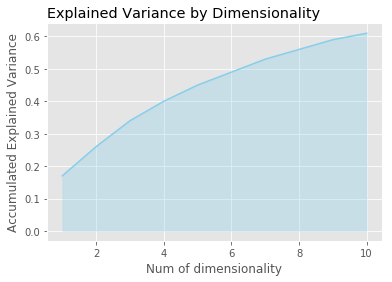

In [14]:
# get seaborn
import seaborn as sns
 
# Make the same graph
plt.fill_between( x, z, color="skyblue", alpha=0.3)
plt.plot(x, z, color="skyblue")
 
# Add titles
plt.title("Explained Variance by Dimensionality", loc="left")
plt.xlabel("Num of dimensionality")
plt.ylabel("Accumulated Explained Variance")


In [15]:
re_X_6 = re_X_ww[:,:6]

In [17]:
re_X_3 = re_X_ww[:,:3]

In [19]:
ls

0810_sample_SVD_TNSE_other_dimensionality.ipynb
0811_outliers_story.ipynb
0811_select_dimensionality_PCA.ipynb
0811_selectedcols_outliers.ipynb
0811_story_of_normal_users_previous_FE.ipynb
Kiva_EDA.ipynb
Kiva_capstone.pptx
README.md
Recommender_system/
References/
__pycache__/
clustering/
column_types.json
df_copy.csv
dropna_pipeline.py
fulldata_pipeline_0811.py
kiva_ds_csv/
lender_dataset.csv
lender_dataset_sampled.csv
lender_main.py
lender_pipeline_uncleaned.py
model.py
model_uncleaned.py
ndf_ww_with_clustering.csv
nlp_why.py
normal_drop_both_Kmeans.ipynb
normal_drop_preference_8D_Kmeans.ipynb
pca_3d_normal.csv
private/
processed_data/
sample_lender_pipeline.py
scripts/
spark-warehouse/


In [20]:
ndf_ww = pd.read_csv('ndf_ww_with_clustering.csv')

In [21]:
ndf_ww.head()

,ACCOUNT_AGE_MONTHS,IS_CORPORATE_CAMPAIGN_USER,IS_FREE_TRIAL_USER,IS_INACTIVE_CREDIT_DONOR,LIFETIME_DONATION_TOTAL,LIFETIME_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,LIFETIME_PROXY_LOAN_PURCHASE_TOTAL,LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM,FIRST_YEAR_DEPOSIT_TOTAL,...,FIRST_BASKET_CATEGORY_Depositor - Lender NonDonor,FIRST_BASKET_CATEGORY_Depositor - Other,FIRST_BASKET_CATEGORY_Donor,FIRST_BASKET_CATEGORY_Kiva Card Redeemer,FIRST_BASKET_CATEGORY_Promo Lender,FIRST_BASKET_CATEGORY_Zombie,FIRST_BASKET_CATEGORY_Other,FIRST_BASKET_CATEGORY_Kiva Card Partial Promo Redeemer,clustering_3d,clustering_6d
0,101,0,0,False,0.00,68.01,125,0,17.600,0.0,...,1,0,0,0,0,0,0,0,3,0
1,100,0,0,False,7.50,57.50,50,0,24.000,0.0,...,0,0,0,0,0,0,0,0,3,3
2,119,0,0,False,11.25,55.31,100,0,21.500,0.0,...,0,0,0,0,0,0,0,0,5,3
3,81,0,0,False,3.75,28.75,50,0,15.500,0.0,...,0,0,0,0,0,0,0,0,3,1
4,133,0,0,False,30.00,135.18,200,0,19.875,0.0,...,0,0,0,0,0,0,0,0,5,3


In [23]:
cluster_mean = ndf_ww.groupby('clustering_6d').mean()

In [27]:
cluster_mean = cluster_mean.drop('clustering_3d',axis=1)

In [28]:
cluster_mean.columns

Index(['ACCOUNT_AGE_MONTHS', 'IS_CORPORATE_CAMPAIGN_USER',
       'IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR',
       'LIFETIME_DONATION_TOTAL', 'LIFETIME_DEPOSIT_TOTAL',
       'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
       'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
       'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
       'FIRST_YEAR_DEPOSIT_TOTAL', 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
       'FIRST_YEAR_DONATION_TOTAL', 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DEPOSIT_TOTAL', 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DONATION_TOTAL', 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
       'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
       'FIRST_YEAR_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
       'NUM_TEAM_MEMBERSHIPS', 'NUM_TEAM_LOANS', 'NUM_TEAM_MESSAGES',
       'NUM_LOAN_COMMENTS', 'NUM_JOURNAL_COMMENTS', 'NU

# radar plot to interpret

In [29]:
radar1 = cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']]

In [33]:
radar1_plus = cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','ave_loan_purchase_per_month']]

In [201]:
radar1_scaled_plus = scaled_cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','ave']]

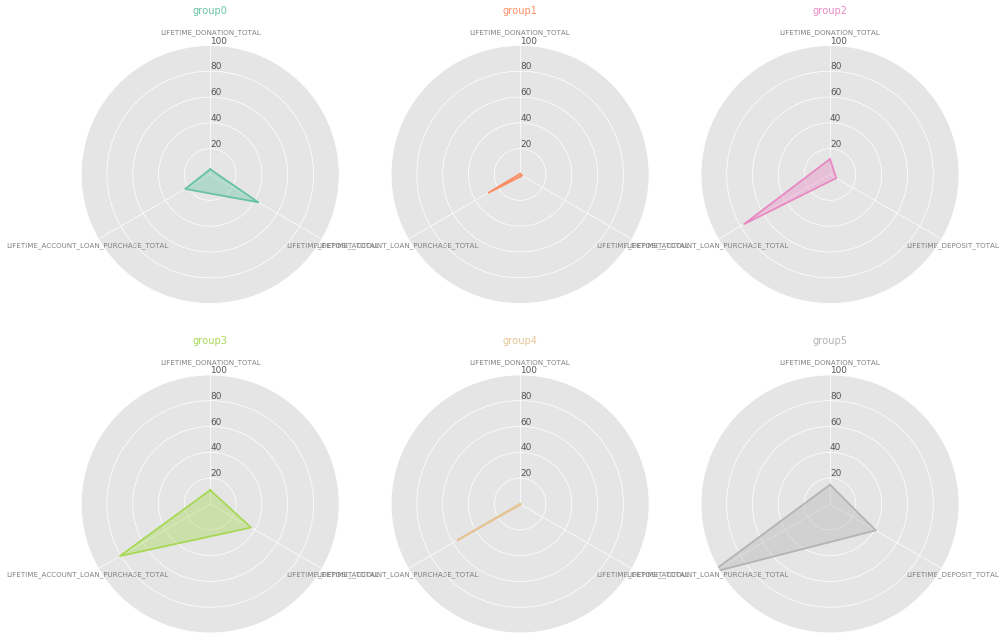

In [89]:
plot_radar(radar1,ylim=(0,100))

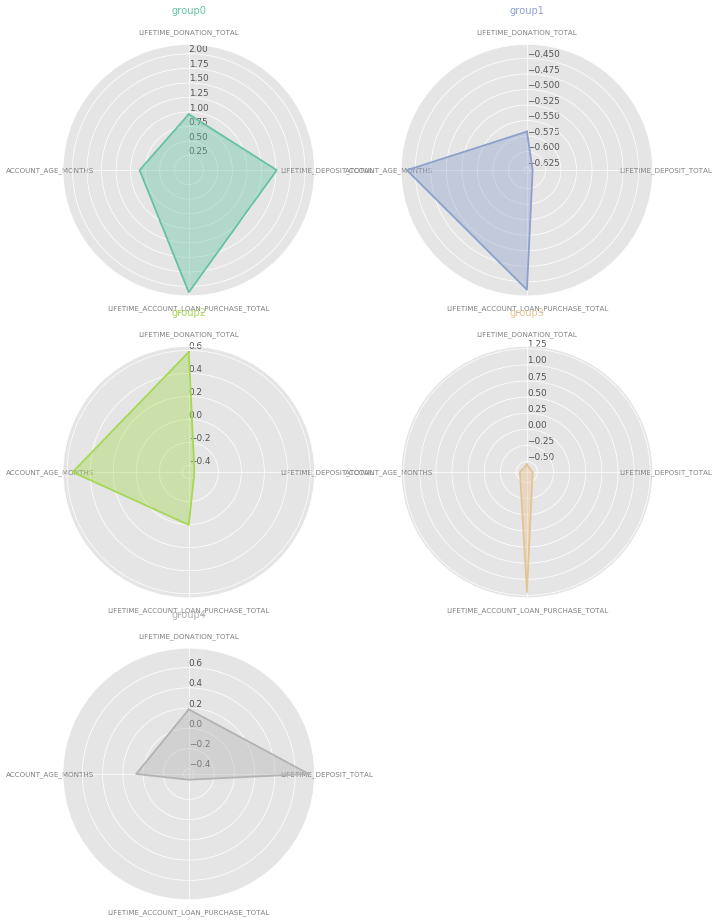

In [202]:
plot_radar(radar1_scaled_plus)

In [214]:
normal['VINTAGE_MONTH'][normal['VINTAGE_MONTH'] >201705]

1499446    201706
1499447    201706
1499448    201706
1499451    201706
1499452    201706
1499453    201707
1499455    201707
1499503    201706
1499504    201706
1499505    201706
1499506    201706
1499507    201706
1499509    201706
1499510    201706
1499511    201707
1499513    201707
1499514    201707
1499548    201706
1499549    201706
1499551    201706
1499552    201706
1499553    201706
1499555    201706
1499556    201706
1499557    201706
1499558    201707
1499559    201707
1499565    201707
1499601    201706
1499602    201706
1499604    201706
1499605    201706
1499606    201706
1499607    201706
1499608    201706
1499609    201707
1499611    201707
1499674    201706
1499675    201706
1499676    201706
1499677    201706
1499678    201706
1499679    201707
1499683    201706
1499727    201706
1499728    201706
1499730    201706
1499731    201706
1499733    201706
1499736    201707
1499738    201707
1499739    201707
1499776    201706
1499778    201707
1499779    201707
1499780   

In [222]:
cluster_mean[['ACCOUNT_AGE_MONTHS','LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','lifetime_ave_tip_rate','LIFETIME_DEPOSIT_TOTAL','LIFETIME_DONATION_TOTAL']]

,ACCOUNT_AGE_MONTHS,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,lifetime_ave_tip_rate,LIFETIME_DEPOSIT_TOTAL,LIFETIME_DONATION_TOTAL
cluster,,,,,
0,89.736335,207.396586,0.091504,51.410358,15.941097
1,46.397894,30.933234,0.005408,0.198000,0.049243
2,79.810731,61.498521,16.667554,5.318899,12.039250
3,42.440040,144.770449,0.002059,1.309590,0.293250
4,63.453254,33.900075,51.629428,32.736870,7.892545


In [88]:
radar1_scaled = scaled_cluster_mean.iloc[:,4:7]

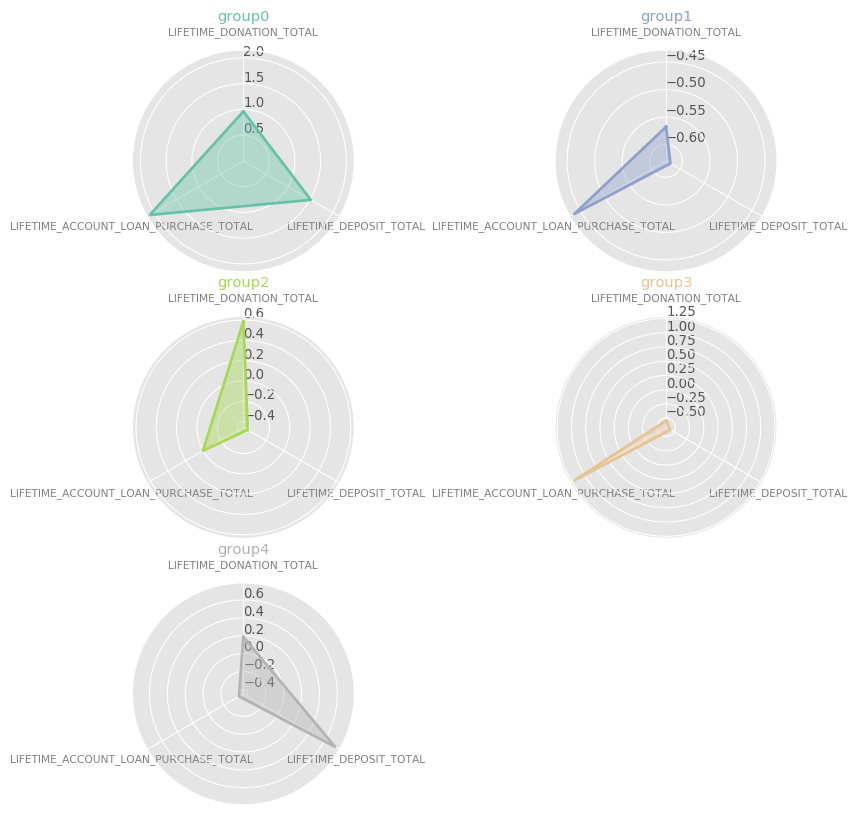

In [89]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar1_scaled.index))

for row in range(0, len(radar1_scaled.index)):
    make_spider(df=radar1_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

### First Year

In [38]:
radar2 = cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL']]

In [96]:
radar2_scaled = scaled_cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL']]

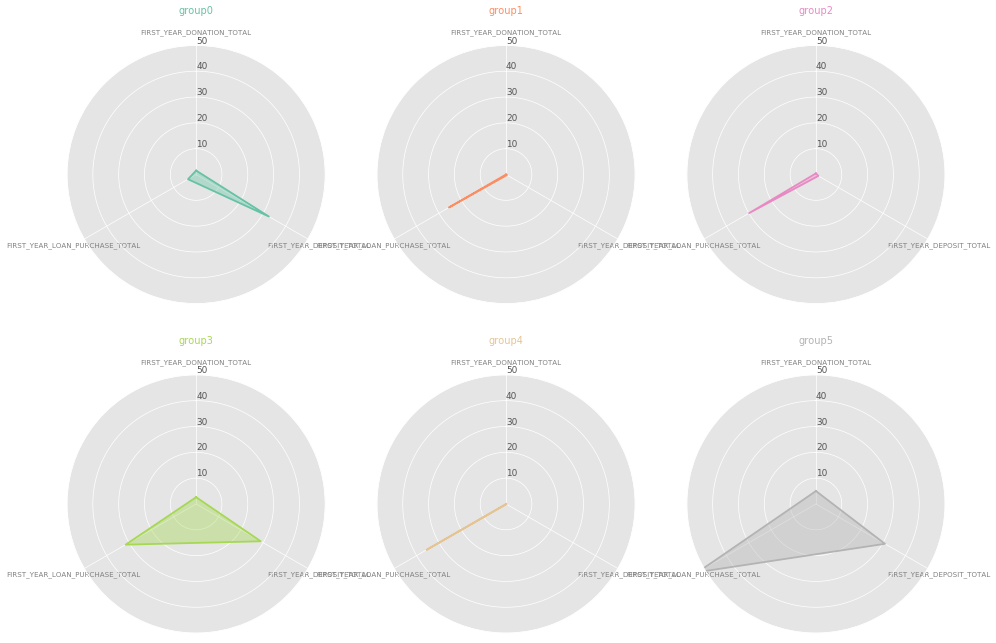

In [90]:
plot_radar(radar2,ylim=(0,50))

In [127]:
radar2_plus = cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL',"FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL",'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL']]

In [128]:
radar2_scaled_plus = scaled_cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL',"FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL",'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL']]

### First Day

In [40]:
radar3 = cluster_mean[['FIRST_DAY_DONATION_TOTAL',"FIRST_DAY_DEPOSIT_TOTAL",'FIRST_DAY_LOAN_PURCHASE_TOTAL']]

In [101]:
radar3_scaled = scaled_cluster_mean[['FIRST_DAY_DONATION_TOTAL',"FIRST_DAY_DEPOSIT_TOTAL",'FIRST_DAY_LOAN_PURCHASE_TOTAL']]

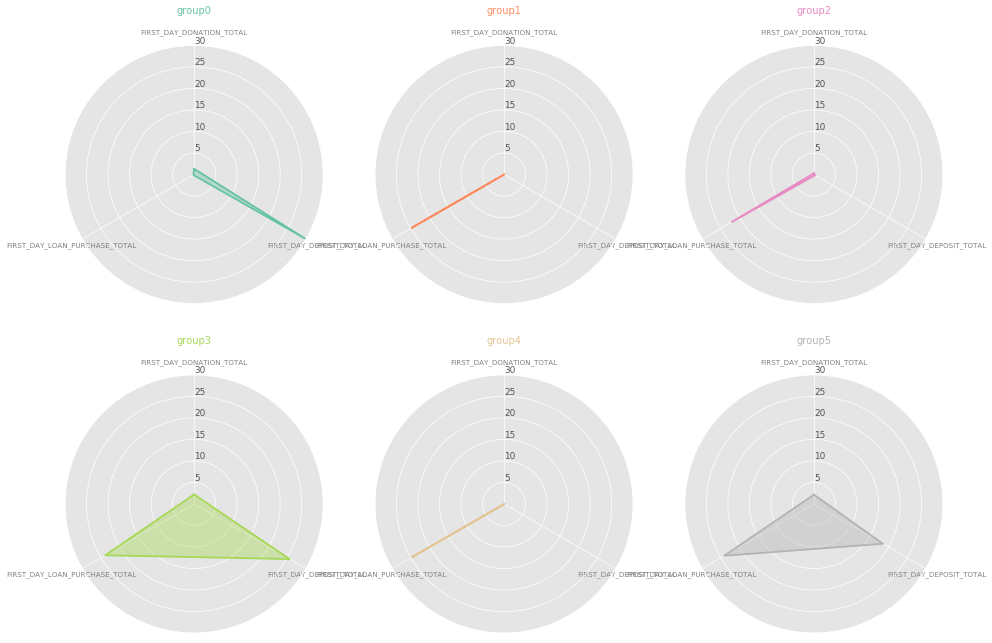

In [57]:
plot_radar(radar3,ylim=(0,30))

In [111]:
list(cluster_mean.columns)

['ACCOUNT_AGE_MONTHS',
 'IS_CORPORATE_CAMPAIGN_USER',
 'IS_FREE_TRIAL_USER',
 'IS_INACTIVE_CREDIT_DONOR',
 'LIFETIME_DONATION_TOTAL',
 'LIFETIME_DEPOSIT_TOTAL',
 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
 'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
 'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
 'FIRST_YEAR_DEPOSIT_TOTAL',
 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
 'FIRST_YEAR_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DEPOSIT_TOTAL',
 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DONATION_TOTAL',
 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
 'NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES',
 'NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS',
 'NUM_DISTINCT_COUNTRIES_LENT_TO',
 'NUM_AFRICA_LOANS',
 'NUM_ASIA_L

In [43]:
radar4 = cluster_mean[['IS_CORPORATE_CAMPAIGN_USER','IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR']]

In [109]:
radar4_scaled = scaled_cluster_mean[['IS_CORPORATE_CAMPAIGN_USER','IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR']]

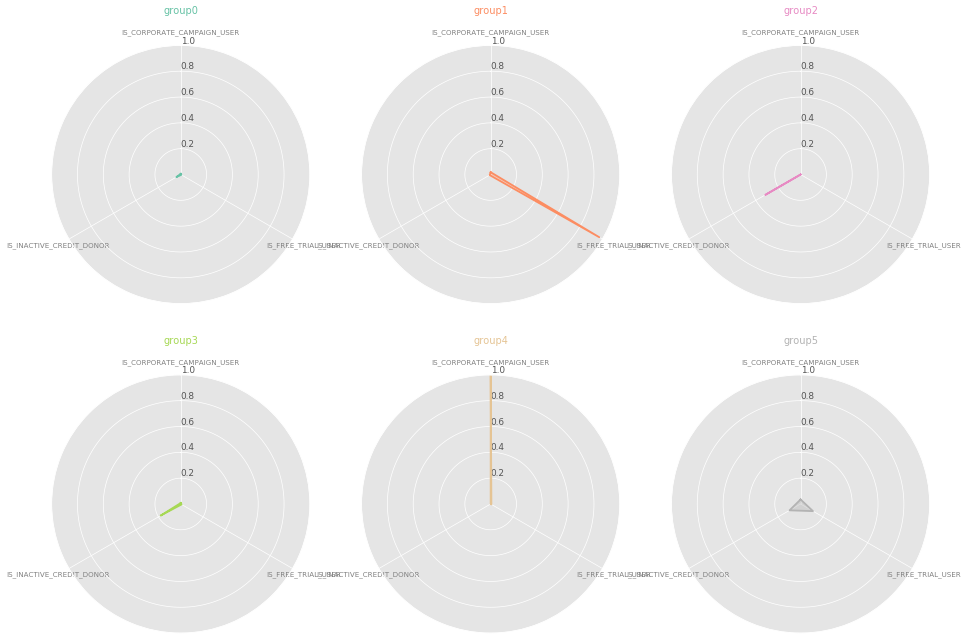

In [91]:
plot_radar(radar4,ylim=(0,1))

In [45]:
radar5 = cluster_mean[['NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES']]

In [113]:
radar5_scaled = scaled_cluster_mean[['NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES']]

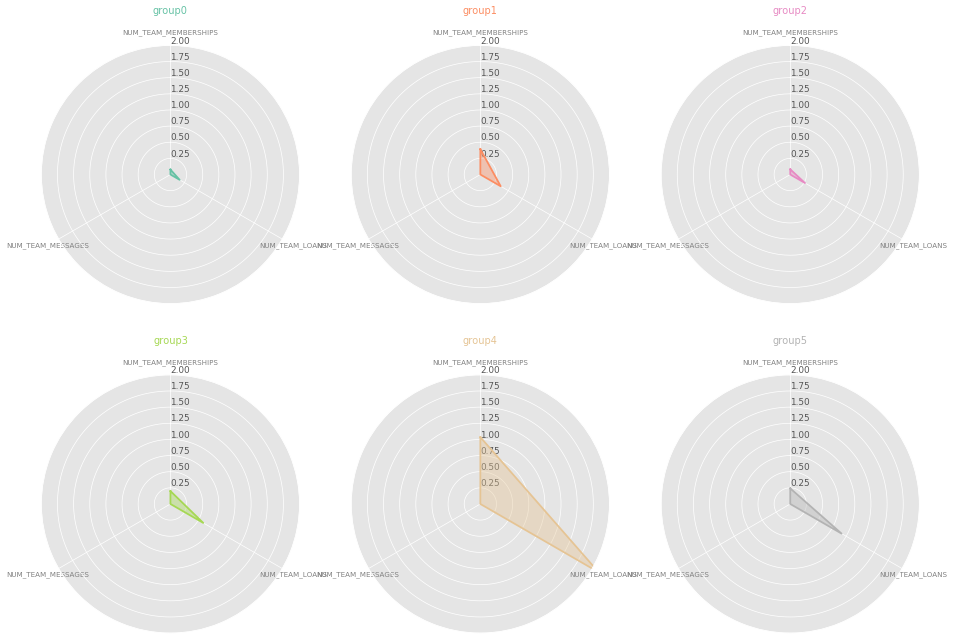

In [94]:
plot_radar(radar5,ylim=(0,2))

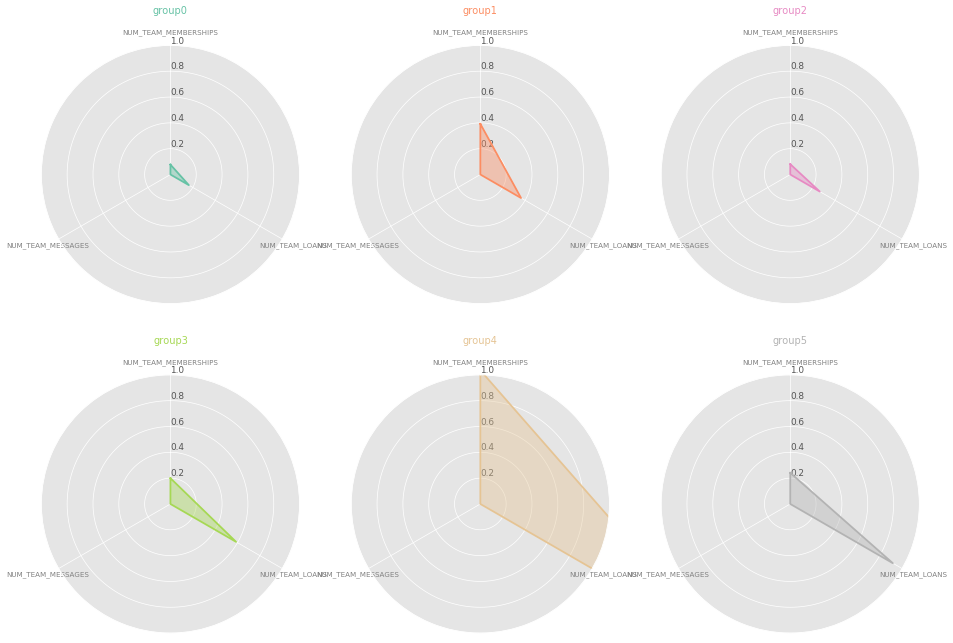

In [58]:
plot_radar(radar5)

In [59]:
radar6 = cluster_mean[['NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS']]


In [117]:
radar6_scaled = scaled_cluster_mean[['NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS']]


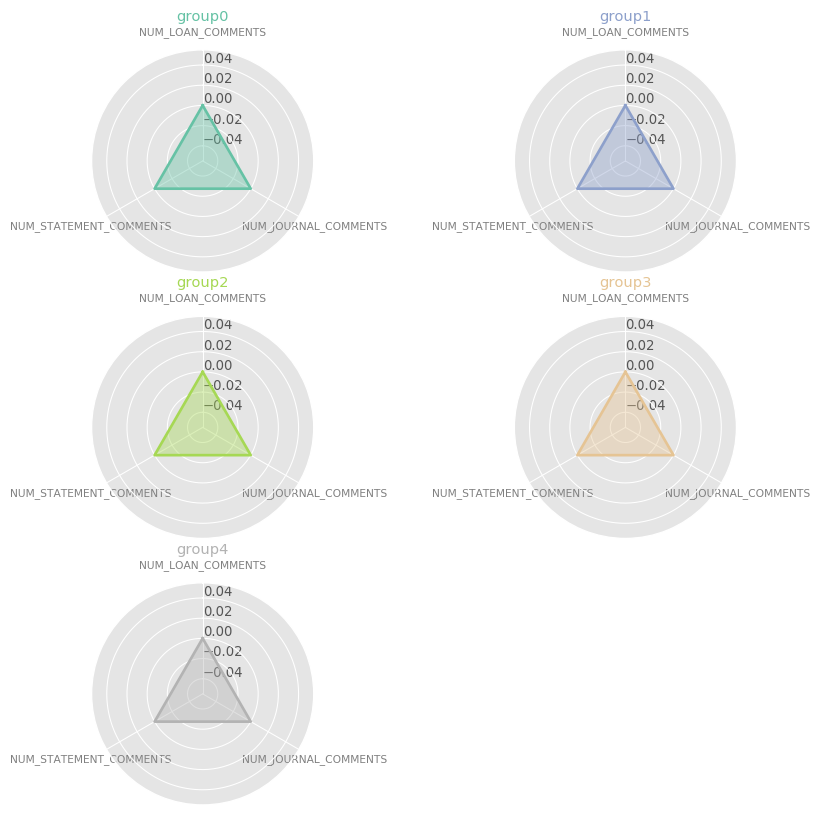

In [118]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar6_scaled.index))

for row in range(0, len(radar6_scaled.index)):
    make_spider(df=radar6_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

In [64]:
radar7 = cluster_mean[['FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM'
 ]]

In [121]:
radar7_scaled = scaled_cluster_mean[['FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM'
 ]]

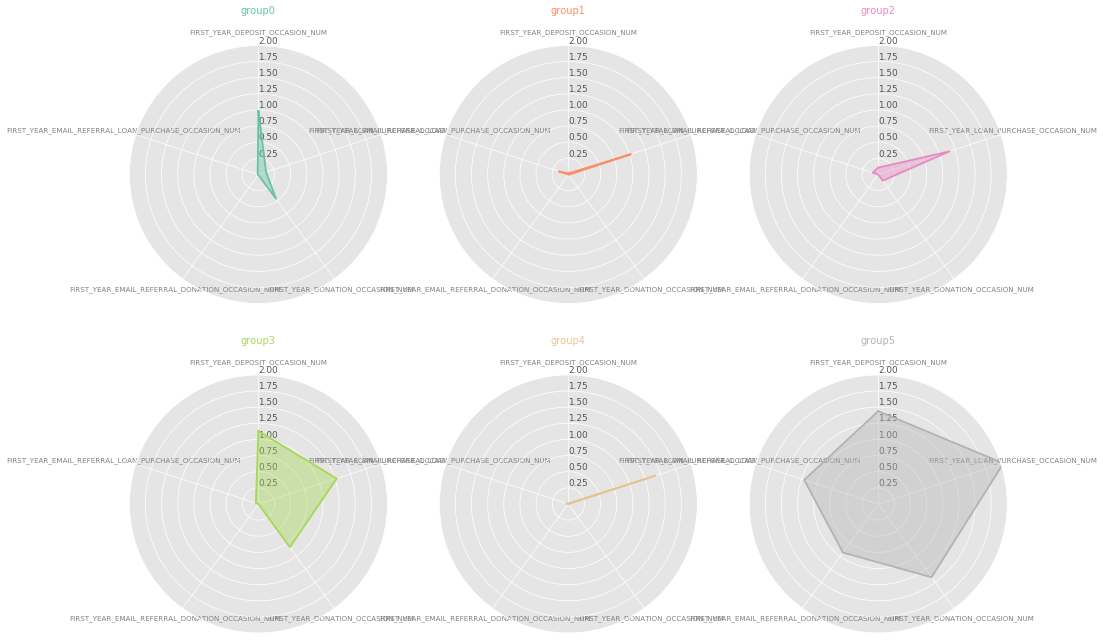

In [68]:
plot_radar(radar7,ylim=(0,2))

In [131]:
list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))

['FIRST_TRANSACTION_REFERRAL_giftcard',
 'FIRST_TRANSACTION_REFERRAL_invited',
 'FIRST_TRANSACTION_REFERRAL_invited_team',
 'FIRST_TRANSACTION_REFERRAL_marketing',
 'FIRST_TRANSACTION_REFERRAL_online_ad',
 'FIRST_TRANSACTION_REFERRAL_search',
 'FIRST_TRANSACTION_REFERRAL_social',
 'FIRST_TRANSACTION_REFERRAL_system_email',
 'FIRST_TRANSACTION_REFERRAL_unknown',
 'FIRST_TRANSACTION_REFERRAL_video_site']

In [69]:
radar8 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))]

In [138]:
normal['cluster'] = y

In [141]:
normal.groupby(['cluster','FIRST_TRANSACTION_REFERRAL']).count().iloc[:,0]

cluster  FIRST_TRANSACTION_REFERRAL
0        direct                          5197
         giftcard                       23485
         invited                        13914
         invited_team                    1046
         marketing                       1752
         online_ad                        355
         search                          4278
         social                           893
         system_email                     302
         unknown                        47976
         video_site                        87
1        direct                        120386
         giftcard                        5659
         invited                        94858
         invited_team                   20464
         marketing                       5798
         online_ad                        355
         search                          3002
         social                          2574
         system_email                    1317
         unknown                       13909

In [153]:
radar8_scaled = scaled_cluster_mean[list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))]

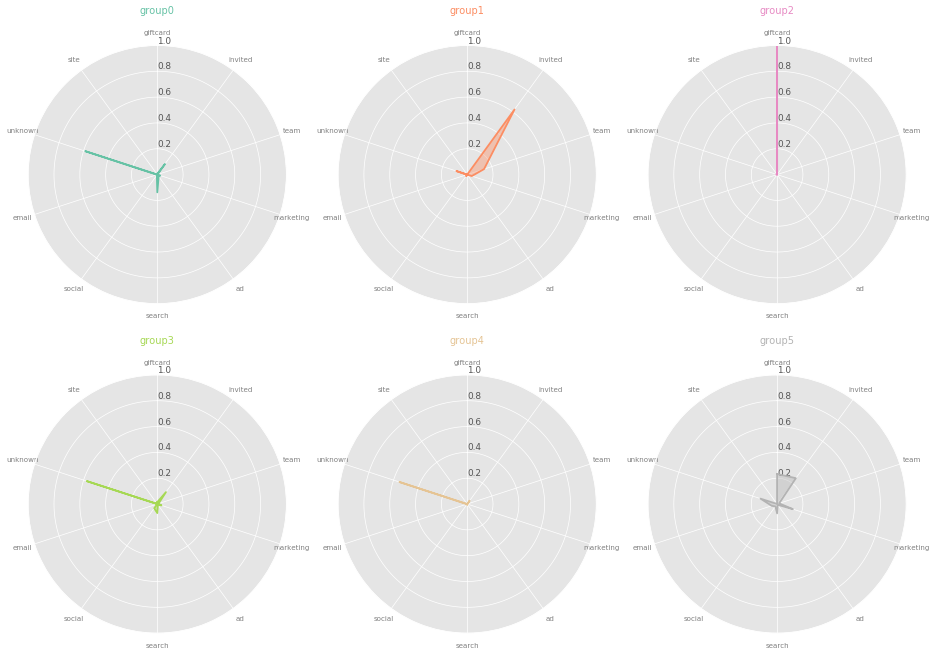

In [70]:
plot_radar(radar8,category=True,ylim=(0,))

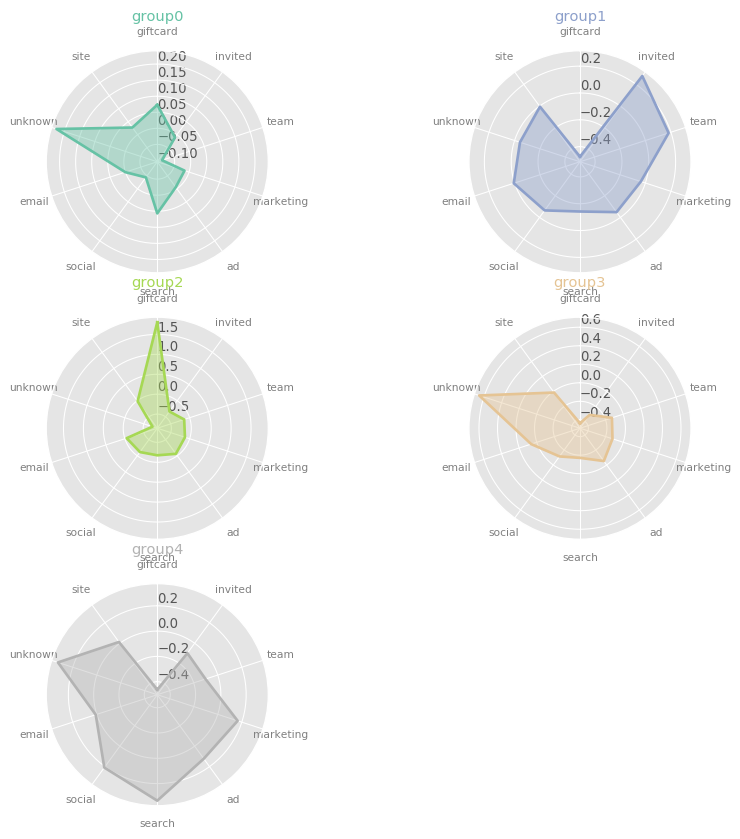

In [154]:
plot_radar(radar8_scaled,category=True)

In [71]:
radar9 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY")))]

In [156]:
radar9_scaled = scaled_cluster_mean[list(cluster_mean.filter(regex=("FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY")))]

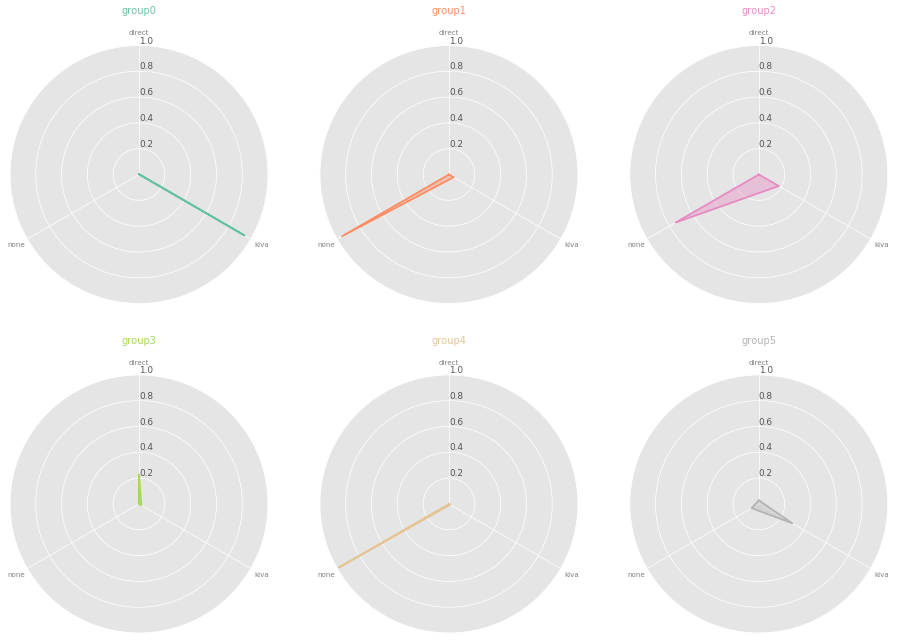

In [72]:
plot_radar(radar9,category=True)

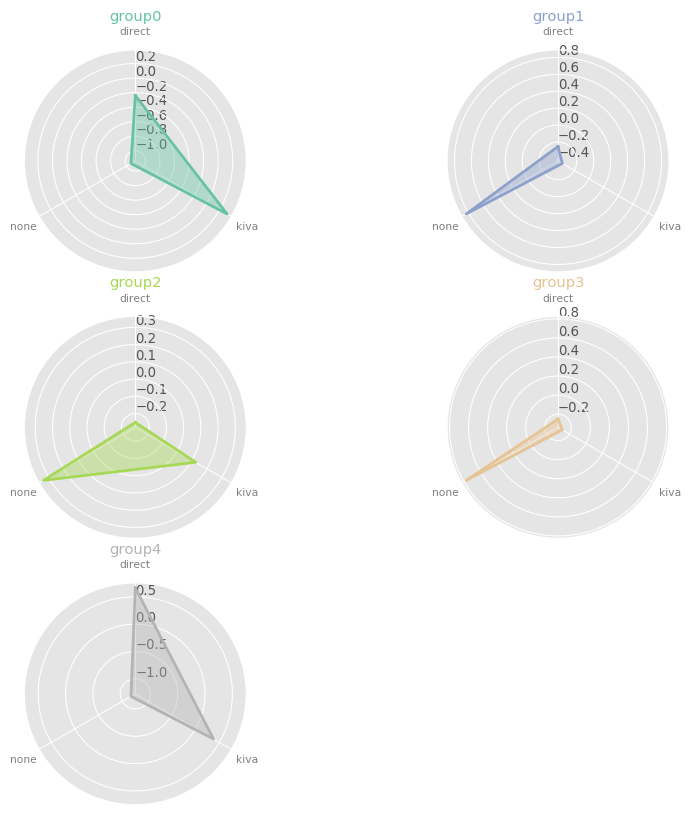

In [158]:
plot_radar(radar9_scaled,category=True)

In [162]:
list(cluster_mean.filter(regex=("NUM_BUNDLE")))

['NUM_BUNDLE_GREEN_LOANS',
 'NUM_BUNDLE_HIGHER_ED_LOANS',
 'NUM_BUNDLE_ISLAMIC_FINANCE_LOANS',
 'NUM_BUNDLE_YOUTH_LOANS',
 'NUM_BUNDLE_STARTUP_LOANS',
 'NUM_BUNDLE_WATER_LOANS',
 'NUM_BUNDLE_VULNERABLE_LOANS',
 'NUM_BUNDLE_FAIR_TRADE_LOANS',
 'NUM_BUNDLE_MOBILE_TECH_LOANS',
 'NUM_BUNDLE_RURAL_LOANS',
 'NUM_BUNDLE_UNDERFUNDED_LOANS',
 'NUM_BUNDLE_CONFLICT_ZONE_LOANS',
 'NUM_BUNDLE_JOB_CREATION_SME_LOANS',
 'NUM_BUNDLE_GROWING_BUSINESSES_LOANS',
 'NUM_BUNDLE_HEALTH_LOANS',
 'NUM_BUNDLE_DISASTER_RECOVERY_LOANS',
 'NUM_BUNDLE_INNOVATIVE_LOANS',
 'NUM_BUNDLE_REFUGEE_LOANS',
 'NUM_BUNDLE_SOCIAL_ENTERPRISE_LOANS',
 'NUM_BUNDLE_CLEAN_ENERGY_LOANS',
 'NUM_BUNDLE_SOLAR_LOANS']

In [74]:
radar11 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_BASKET_CATEGORY_Depositor")))]
radar12 = cluster_mean[['ACCOUNT_AGE_MONTHS','last_login_today_months']]
radar13 = cluster_mean[['LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM']]
radar14 = cluster_mean[['lifetime_ave_donation_rate']] 

In [73]:
cluster_mean.columns

Index(['ACCOUNT_AGE_MONTHS', 'IS_CORPORATE_CAMPAIGN_USER',
       'IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR',
       'LIFETIME_DONATION_TOTAL', 'LIFETIME_DEPOSIT_TOTAL',
       'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
       'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
       'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
       'FIRST_YEAR_DEPOSIT_TOTAL', 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
       'FIRST_YEAR_DONATION_TOTAL', 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DEPOSIT_TOTAL', 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
       'FIRST_DAY_DONATION_TOTAL', 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
       'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
       'FIRST_YEAR_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
       'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
       'NUM_TEAM_MEMBERSHIPS', 'NUM_TEAM_LOANS', 'NUM_TEAM_MESSAGES',
       'NUM_LOAN_COMMENTS', 'NUM_JOURNAL_COMMENTS', 'NU

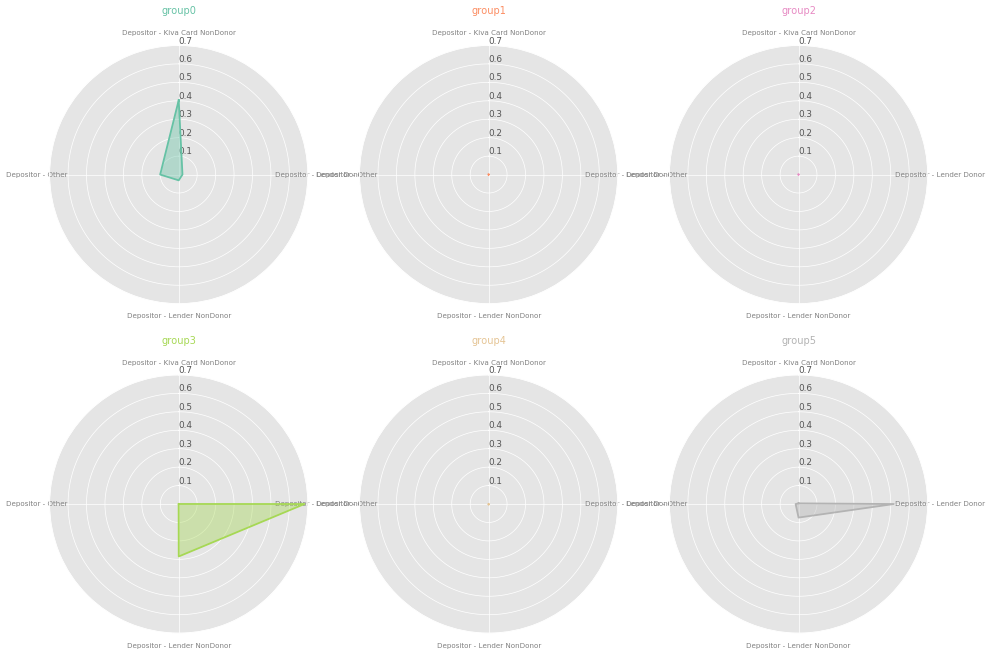

In [79]:
plot_radar(radar11,category=True, ylim=(0,0.7))

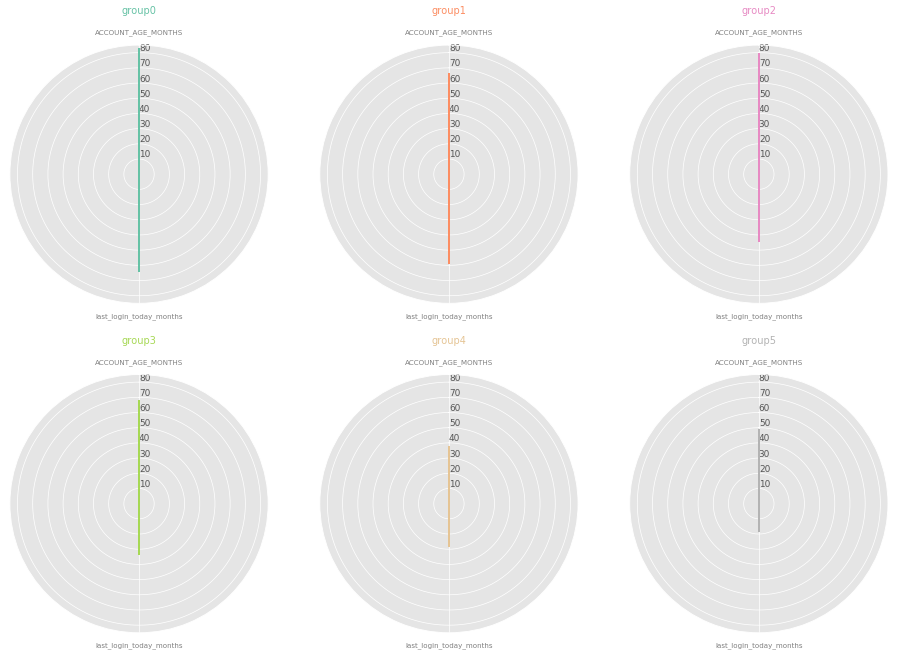

In [83]:
plot_radar(radar12,ylim=(0,85))

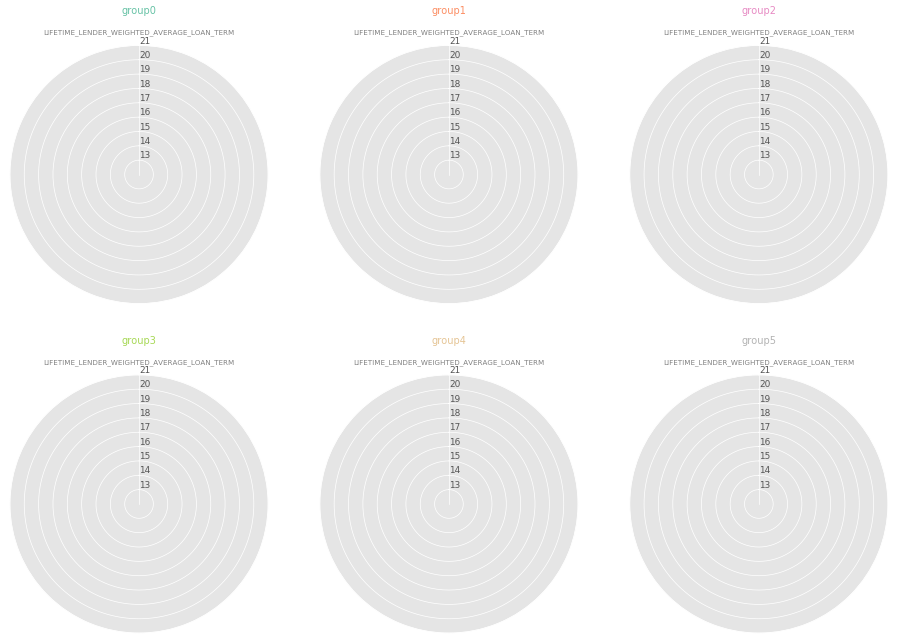

In [87]:
plot_radar(radar13,ylim=(12,21))

In [88]:
cluster_mean["lifetime_ave_donation_rate"]

clustering_6d
0    2.003217
1    0.009982
2    0.427357
3    0.215344
4    0.001003
5    0.234784
Name: lifetime_ave_donation_rate, dtype: float64